# Feature extraction without DATA AUGMENTATION
  pretrained models mention in book Deep learning with Python by (François Chollet) (page no:145)
  
     Xception
     Inception V3
     ResNet50
     VGG16
     VGG19
     MobileNet

# Description of VGG16 model
VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it.
It was used to win the ILSVR (ImageNet) competition in 2014.
To this day is it still considered to be an excellent vision model, although it has been somewhat outperformed by more revent advances such as Inception and ResNet.


In [8]:
import os
import numpy as np

In [2]:
# location of files
# using files that we copied in the start

original_dataset_dir = "train"
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
print(train_dir)
print(validation_dir)
print(test_dir)

cats_and_dogs_small\train
cats_and_dogs_small\validation
cats_and_dogs_small\test


In [3]:
# loaded the model
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,
                  input_shape=(150, 150, 3))

In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [6]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                    directory,
                    target_size=(150, 150),
                    batch_size=batch_size,
                    class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 834us/sample - loss: 0.6233 - acc: 0.6460 - val_loss: 0.4402 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 1s 443us/sample - loss: 0.4180 - acc: 0.8170 - val_loss: 0.3603 - val_acc: 0.8670
Epoch 3/30
2000/2000 [==============================] - 1s 424us/sample - loss: 0.3593 - acc: 0.8475 - val_loss: 0.3171 - val_acc: 0.8740
Epoch 4/30
2000/2000 [==============================] - 1s 451us/sample - loss: 0.3110 - acc: 0.8750 - val_loss: 0.3019 - val_acc: 0.8700
Epoch 5/30
2000/2000 [==============================] - 1s 455us/sample - loss: 0.2840 - acc: 0.8885 - val_loss: 0.2793 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 1s 442us/sample - loss: 0.2578 - acc: 0.8970 - val_loss: 0.2742 - val_acc: 0.8880
Epoch 7/30
2000/2000 [==============================] - 1s 441us/sample - loss: 0.2442 - acc: 0.9080 - val_loss: 0.2737 - va

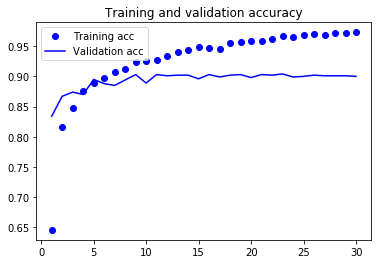

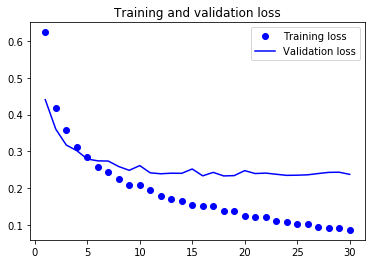

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()